**Import Libraries**

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**Load and Prepare Data**

In [22]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_data = customers.merge(transactions, on='CustomerID', how='left')
customer_data.fillna({'TotalValue': 0, 'Quantity': 0}, inplace=True)

**Perform Clustering**

In [23]:
features = customer_data[['TotalValue', 'Quantity']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)
print("Customer cluster assignments saved to 'Customer_Clusters.csv'")

Customer cluster assignments saved to 'Customer_Clusters.csv'


**Perform Clustering Metrics Evaluation**

In [24]:
cluster_labels = customer_data['Cluster']

db_index = davies_bouldin_score(features_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")

silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Davies-Bouldin Index: 0.710
Silhouette Score: 0.454


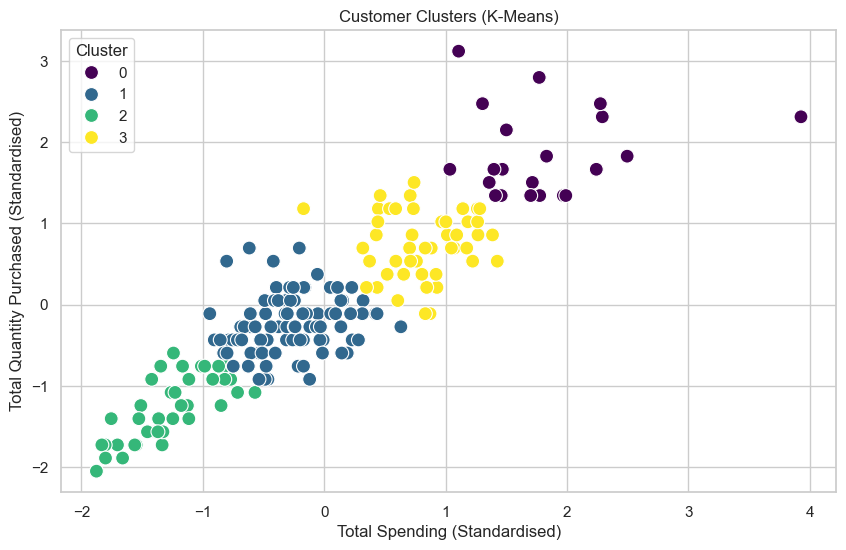

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_scaled[:, 0], 
    y=features_scaled[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=100
)
plt.title('Customer Clusters (K-Means)')
plt.xlabel('Total Spending (Standardised)')
plt.ylabel('Total Quantity Purchased (Standardised)')
plt.legend(title='Cluster')
plt.show()

**Save Results**

In [26]:
# Save the enriched dataset with clustering metrics
customer_data.to_csv('Pratik_Singh_Clustering.csv', index=False)
print("Enriched dataset saved to 'Pratik_Singh_Clustering.csv'")


Enriched dataset saved to 'Pratik_Singh_Clustering.csv'
